# *🧠 Example 1: The 0-1 Knapsack Problem*

*The 0-1 Knapsack Problem is a classic combinatorial optimization problem. It models real-life scenarios where we must choose a subset of items that gives the maximum total value* without exceeding a weight limit.*




*🎒 Problem Statement*

We are given:
- A set of `n` items
- Each item `i` has:
  - A *weight* `wᵢ`
  - A *value* `vᵢ`
- A knapsack (bag) that can carry up to `C` kg

*Goal:*  
Select items so that:
- Total **value** is maximized
- Total **weight** is within the limit
- Items are either **fully included or excluded** (0 or 1 only)

This is why it’s called the “0-1” Knapsack Problem.



*🧪 Example Scenario*

You are packing a backpack with a 15 kg weight limit. You have 8 items:

| Item | Weight (kg) | Value ($) |
|------|-------------|-----------|
| 0    | 4           | 10        |
| 1    | 2           | 5         |
| 2    | 5           | 18        |
| 3    | 4           | 12        |
| 4    | 5           | 15        |
| 5    | 2           | 3         |
| 6    | 3           | 2         |
| 7    | 5           | 8         |

The goal is to choose items that give the highest value *without exceeding 15 kg total*.


In [ ]:
# 🧮 Solving 0-1 Knapsack Problem Using Gurobi

# Step 1: Data (weights, values, capacity)
W = [4,2,5,4,5,2,3,5]
V = [10,5,18,12,15,3,2,8]
C = 15
N = len(W)

In [ ]:
# Step 2: Import Gurobi
from gurobipy import *
# Step 3: Create Model
knapsack_model = Model('knapsack')


*🧮 Mathematical Model of the 0-1 Knapsack Problem*

Let:
- `n` = total number of items
- `vᵢ` = value of item `i`
- `wᵢ` = weight of item `i`
- `xᵢ` = decision variable:
    - 1 if item `i` is selected
    - 0 if item `i` is not selected
- `C` = capacity of the knapsack

We want to:

*Maximize:*
##       ∑₍ᵢ₌₁ ₜₒ ₙ₎ vᵢ · xᵢ

*Subject to:*
##        ∑₍ᵢ₌₁ ₜₒ ₙ₎ wᵢ · xᵢ ≤ C

*And:*
        xᵢ ∈ {0, 1}  for all i = 1 to n

In [ ]:
# Step 4: Add Binary Decision Variables
X = knapsack_model.addVars(N, vtype=GRB.BINARY, name="x")

# Step 5: Objective Function (maximize total value)
obj_fn = sum(V[i]*X[i] for i in range(N))
knapsack_model.setObjective(obj_fn, GRB.MAXIMIZE)

# Step 6: Constraint (total weight ≤ capacity)
knapsack_model.addConstr(sum(W[i]*X[i] for i in range(N)) <= C)

# Step 7: Solve Model
knapsack_model.setParam('OutputFlag', False)
knapsack_model.optimize()

print('Optimization is done. Objective Function Value: %.2f' % knapsack_model.objVal)

for v in knapsack_model.getVars():
    print('%s: %g' % (v.varName, v.x))

Optimization is done. Objective Function Value: 45.00
x[0]: 0
x[1]: 0
x[2]: 0
x[3]: 0
x[4]: 0
x[5]: 0
x[6]: 0
x[7]: 0
x[0]: 0
x[1]: 0
x[2]: 1
x[3]: 1
x[4]: 1
x[5]: 0
x[6]: 0
x[7]: 0


# 🧠 Example 2: Simple Polynomial Optimization using Gurobi

In this example, we solve a basic nonlinear optimization problem using **Gurobi** in Python. The objective is a polynomial (quadratic) function with one linear constraint.

This type of model is helpful when the relationship between decision variables and outcomes (e.g., cost, profit, utility) is *nonlinear*.

---

## 🔢 Mathematical Formulation

We want to:

**Maximize:**
$$3x^{2} + y^{2} - 2z^{2}$$

**Subject to:**
$$3x + 2y - 8z = -50$$

**Where:**
$$x, y, z \in \mathbb{R}$$

---

🧮 This is a **Quadratic Program (QP)**, where the objective is quadratic, and the constraint is linear.

In [ ]:
# Simple polynomial optimization

import gurobipy as gp
from gurobipy import GRB

# Create a new model
model = gp.Model("simple_optimization")

# Create variables
x = model.addVar(name="x")
y = model.addVar(name="y")
z = model.addVar(name="z")

# Set the objective function
model.setObjective(3 * x * x + y * y - 2 * z * z, GRB.MAXIMIZE)

# Add constraints
model.addConstr(3 * x + 2 * y - 8 * z == -50, "c0")

# Optimize the model
model.optimize()

# Print the results
if model.status == GRB.OPTIMAL:
    for v in model.getVars():
        print(f'{v.varName}: {v.x}')
    print(f'Objective: {model.objVal}')
else:
    print("No optimal solution found.")

Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 1 rows, 3 columns and 3 nonzeros
Model fingerprint: 0x9c2a78d1
Model has 3 quadratic objective terms
Coefficient statistics:
  Matrix range     [2e+00, 8e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 6e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+01, 5e+01]

Continuous model is non-convex -- solving as a MIP

Presolve time: 0.00s
Presolved: 4 rows, 8 columns, 11 nonzeros
Presolved model has 1 quadratic constraint(s)
Presolved model has 2 bilinear constraint(s)
         in product terms.
         Presolve was not able to compute smaller bounds for these variables.
         Consider bounding these variables or reformulating the model.

Variable types: 8 continuous, 0 integer (0 binary)
Found heurist

# 🚛 Example 3: Transportation Problem using Gurobi

This example demonstrates solving a **classical transportation problem** using **Gurobi** in Python. The goal is to minimize the total cost of transporting goods from supply sources to demand destinations.

Transportation problems are fundamental in **operations research** and are widely used in logistics, supply chain management, and distribution planning.

---

## 🔢 Mathematical Formulation

We want to:

**Minimize:**
$$\sum_{i \in I} \sum_{j \in J} c_{ij} \cdot x_{ij}$$

**Subject to:**

**Supply Constraints:**
$$\sum_{j \in J} x_{ij} \leq s_i, \quad \forall i \in I$$

**Demand Constraints:**
$$\sum_{i \in I} x_{ij} = d_j, \quad \forall j \in J$$

**Non-negativity:**
$$x_{ij} \geq 0, \quad \forall i \in I, \forall j \in J$$

**Where:**
- $x_{ij}$ = units transported from source $i$ to destination $j$
- $c_{ij}$ = cost per unit from source $i$ to destination $j$
- $s_i$ = supply capacity at source $i$
- $d_j$ = demand requirement at destination $j$
- $I$ = set of sources, $J$ = set of destinations

---

## 📊 Problem Instance

**Sources:** S1, S2  
**Destinations:** D1, D2, D3

**Supply Capacities:**
- S1: 20 units
- S2: 30 units
- **Total Supply:** 50 units

**Demand Requirements:**
- D1: 10 units  
- D2: 25 units
- D3: 15 units
- **Total Demand:** 50 units

**Transportation Costs (per unit):**

| From/To | D1 | D2 | D3 |
|---------|----|----|----|
| **S1**  | 8  | 6  | 10 |
| **S2**  | 9  | 12 | 7  |

---

🎯 This is a **balanced transportation problem** since total supply equals total demand (50 = 50).

The model will find the optimal allocation that minimizes total transportation cost while satisfying all supply and demand constraints.

In [ ]:
# Transportation model

import gurobipy as gp
from gurobipy import GRB

# Define the data
sources = ['S1', 'S2']
demands = ['D1', 'D2', 'D3']
supply = {'S1': 20, 'S2': 30}
demand = {'D1': 10, 'D2': 25, 'D3': 15}
cost = {
    ('S1', 'D1'): 8, ('S1', 'D2'): 6, ('S1', 'D3'): 10,
    ('S2', 'D1'): 9, ('S2', 'D2'): 12, ('S2', 'D3'): 7
}

# Create a new model
model = gp.Model("transportation")

# Create variables
x = model.addVars(sources, demands, name="x")

# Set objective
model.setObjective(gp.quicksum(cost[s, d] * x[s, d] for s in sources for d in demands), GRB.MINIMIZE)

# Add supply constraints
model.addConstrs((gp.quicksum(x[s, d] for d in demands) <= supply[s] for s in sources), name="Supply")

# Add demand constraints
model.addConstrs((gp.quicksum(x[s, d] for s in sources) == demand[d] for d in demands), name="Demand")

# Optimize model
model.optimize()

# Print the results
if model.status == GRB.OPTIMAL:
    for s in sources:
        for d in demands:
            if x[s, d].x > 0:
                print(f"Transport {x[s, d].x} units from {s} to {d} at cost {cost[s, d]} per unit")
else:
    print("No optimal solution found")

Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 5 rows, 6 columns and 12 nonzeros
Model fingerprint: 0xab1bdb4e
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [6e+00, 1e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+01, 3e+01]
Presolve removed 5 rows and 6 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.7500000e+02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective  3.750000000e+02
Transport 20.0 units from S1 to D2 at cost 6 per unit
Transport 10.0 units from S2 to D1 at cost 9 per unit
Transport 5.0 units from S2 to D2 at cost 12 per unit
Transport 15.0 units from S2 to D3 at

# 📍 Example 4: Maximum Coverage Location Problem (MCLP) using Gurobi

This example demonstrates solving the **Maximum Coverage Location Problem** using **Gurobi** in Python. The goal is to strategically locate a limited number of facilities to maximize the total weighted demand coverage within a specified service distance.

MCLP is crucial in **facility location planning** for emergency services, retail stores, healthcare facilities, and public infrastructure placement.

---

## 🔢 Mathematical Formulation

We want to:

**Maximize:**
$$\sum_{i \in I} w_i \cdot y_i$$

**Subject to:**

**Coverage Constraints:**
$$y_i \leq \sum_{j \in S_i} x_j, \quad \forall i \in I$$

**Facility Limit:**
$$\sum_{j \in J} x_j \leq p$$

**Binary Variables:**
$$x_j \in \{0,1\}, \quad \forall j \in J$$
$$y_i \in \{0,1\}, \quad \forall i \in I$$

**Where:**
- $x_j$ = 1 if facility is located at site $j$, 0 otherwise
- $y_i$ = 1 if demand point $i$ is covered, 0 otherwise  
- $w_i$ = weight/importance of demand point $i$
- $S_i$ = set of facility sites that can cover demand point $i$
- $p$ = maximum number of facilities to locate
- $I$ = set of demand points, $J$ = set of potential facility sites

---

## 📊 Problem Instance

**Demand Points:** D1, D2, D3, D4  
**Potential Facilities:** F1, F2, F3  
**Maximum Facilities:** 2  
**Coverage Distance:** 3 units

**Distance Matrix:**

| Demand/Facility | F1 | F2 | F3 |
|-----------------|----|----|----|
| **D1**          | 2  | 4  | 5  |
| **D2**          | 3  | 2  | 6  |
| **D3**          | 4  | 3  | 2  |
| **D4**          | 5  | 6  | 3  |

**Demand Weights:**
- D1: 10 (population/importance)
- D2: 20  
- D3: 30
- D4: 40
- **Total Potential Coverage:** 100

**Coverage Sets (facilities within 3 units):**
- D1 can be covered by: F1, F2
- D2 can be covered by: F1, F2  
- D3 can be covered by: F2, F3
- D4 can be covered by: F3

---

🎯 This is a **discrete facility location problem** where we select the best 2 facilities to maximize weighted demand coverage.

In [ ]:
# MCLP Model

import gurobipy as gp
from gurobipy import GRB

# Define the data
I = ['D1', 'D2', 'D3', 'D4']
J = ['F1', 'F2', 'F3']
d = {
    ('D1', 'F1'): 2, ('D1', 'F2'): 4, ('D1', 'F3'): 5,
    ('D2', 'F1'): 3, ('D2', 'F2'): 2, ('D2', 'F3'): 6,
    ('D3', 'F1'): 4, ('D3', 'F2'): 3, ('D3', 'F3'): 2,
    ('D4', 'F1'): 5, ('D4', 'F2'): 6, ('D4', 'F3'): 3
}
coverage_distance = 3
S = {i: [j for j in J if d[i, j] <= coverage_distance] for i in I}
p = 2
w = {'D1': 10, 'D2': 20, 'D3': 30, 'D4': 40}

# Create a new model
model = gp.Model("MCLP")

# Create variables
x = model.addVars(J, vtype=GRB.BINARY, name="x")
y = model.addVars(I, vtype=GRB.BINARY, name="y")

# Set objective
model.setObjective(gp.quicksum(w[i] * y[i] for i in I), GRB.MAXIMIZE)

# Add constraints
model.addConstrs((y[i] <= gp.quicksum(x[j] for j in S[i]) for i in I), name="Coverage")
model.addConstr(gp.quicksum(x[j] for j in J) <= p, name="FacilityLimit")

# Optimize model
model.optimize()

# Print the results
if model.status == GRB.OPTIMAL:
    print("Optimal solution found:")
    for j in J:
        if x[j].x > 0.5:
            print(f"Facility located at {j}")
    for i in I:
        if y[i].x > 0.5:
            print(f"Demand point {i} is covered")
else:
    print("No optimal solution found")


Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 5 rows, 7 columns and 13 nonzeros
Model fingerprint: 0x95e97aca
Variable types: 0 continuous, 7 integer (7 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 4e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Found heuristic solution: objective -0.0000000
Presolve removed 5 rows and 7 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 2 available processors)

Solution count 2: 100 -0 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.000000000000e+02, best bound 1.000000000000e+02, gap 0.0000%
Optimal solution found:
Facility located at F1
Faci

# 📍Example 5: P-Median Problem using Gurobi

This example demonstrates solving the **P-Median Problem** using **Gurobi** in Python. The objective is to locate exactly **p facilities** among potential sites to **minimize the total weighted distance** between demand points and their assigned facilities.

P-Median is widely used in **location analysis** for services like warehouses, hospitals, or distribution centers where minimizing travel or service distance is critical.

---

## 🔢 Mathematical Formulation

We want to:

**Minimize:**

$$
\sum_{i \in I} \sum_{j \in J} d_{ij} \cdot y_{ij}
$$

**Subject to:**

**Demand Assignment:**

$$
\sum_{j \in J} y_{ij} = 1, \quad \forall i \in I
$$

**Assignment only to open facilities:**

$$
y_{ij} \leq x_j, \quad \forall i \in I, j \in J
$$

**Facility count constraint:**

$$
\sum_{j \in J} x_j = p
$$

**Binary variables:**

$$
x_j \in \{0,1\}, \quad \forall j \in J
$$

$$
y_{ij} \in \{0,1\}, \quad \forall i \in I, j \in J
$$

---

**Where:**

- $x_j = 1$ if a facility is opened at site $j$, else 0  
- $y_{ij} = 1$ if demand point $i$ is assigned to facility $j$, else 0  
- $d_{ij}$ = distance from demand point $i$ to facility $j$  
- $p$ = total number of facilities to locate  
- $I$ = set of demand points, $J$ = set of potential facility sites  

---

## 📊 Problem Instance

- Demand Points: D1, D2, D3, D4  
- Potential Facilities: F1, F2, F3  
- Number of Facilities to open ($p$): 2

**Distance Matrix:**

| Demand/Facility | F1 | F2 | F3 |
|-----------------|----|----|----|
| **D1**          | 2  | 4  | 5  |
| **D2**          | 3  | 2  | 6  |
| **D3**          | 4  | 3  | 2  |
| **D4**          | 5  | 6  | 3  |

---

🎯 The goal is to minimize the total distance between demand points and their assigned facilities while opening exactly 2 facilities.


In [ ]:
import gurobipy as gp
from gurobipy import GRB

# Define the data
I = ['D1', 'D2', 'D3', 'D4']
J = ['F1', 'F2', 'F3']
d = {
    ('D1', 'F1'): 2, ('D1', 'F2'): 4, ('D1', 'F3'): 5,
    ('D2', 'F1'): 3, ('D2', 'F2'): 2, ('D2', 'F3'): 6,
    ('D3', 'F1'): 4, ('D3', 'F2'): 3, ('D3', 'F3'): 2,
    ('D4', 'F1'): 5, ('D4', 'F2'): 6, ('D4', 'F3'): 3
}
p = 2

# Create a new model
model = gp.Model("p-median")

# Create variables
x = model.addVars(J, vtype=GRB.BINARY, name="x")
y = model.addVars(I, J, vtype=GRB.BINARY, name="y")

# Set objective to minimize total assignment distance
model.setObjective(gp.quicksum(d[i, j] * y[i, j] for i in I for j in J), GRB.MINIMIZE)

# Demand assignment constraints: each demand assigned to exactly one facility
model.addConstrs((gp.quicksum(y[i, j] for j in J) == 1 for i in I), name="Assign")

# Assignments only allowed to open facilities
model.addConstrs((y[i, j] <= x[j] for i in I for j in J), name="Open")

# Exactly p facilities open
model.addConstr(gp.quicksum(x[j] for j in J) == p, name="FacilityCount")

# Optimize model
model.optimize()

# Print the results
if model.status == GRB.OPTIMAL:
    print("Optimal solution found:")
    for j in J:
        if x[j].x > 0.5:
            print(f"Facility located at {j}")
    for i in I:
        for j in J:
            if y[i, j].x > 0.5:
                print(f"Demand point {i} is assigned to facility {j}")
else:
    print("No optimal solution found")


Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 17 rows, 15 columns and 39 nonzeros
Model fingerprint: 0x0ec5554b
Variable types: 0 continuous, 15 integer (15 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 6e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+00]
Found heuristic solution: objective 19.0000000
Presolve removed 17 rows and 15 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 2 available processors)

Solution count 2: 10 19 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.000000000000e+01, best bound 1.000000000000e+01, gap 0.0000%
Optimal solution found:
Facility located at F1

## Visualization

This simple graph helps you **see which demand points are assigned to which open facilities** in the P-Median solution.

### 📌 Legend:
- **Blue circles** = Demand points (customers).
- **Red circles** = Facilities that were selected (opened).
- **Gray circles** = Facilities that were not opened.
- **Gray lines** = Show which facility each demand is assigned to.

### 📊 How to Read the Graph:
- Each **line** goes from a **blue node (demand)** to a **red node (facility)**.
- Only **opened facilities** (in red) will have incoming lines.
- Facilities with no red color were **not chosen** by the optimization.



/tmp/ipython-input-2268116927.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


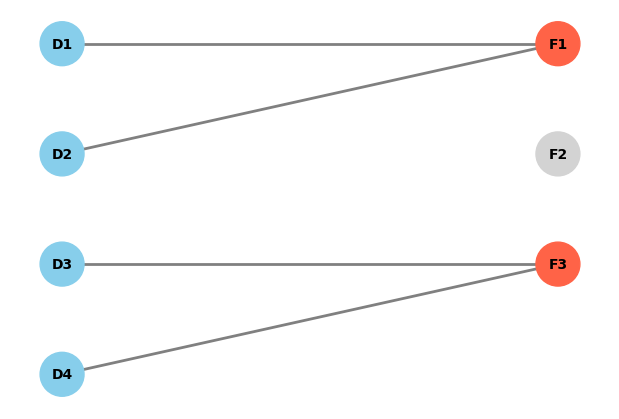

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Set distance between nodes vertically
gap = 1.2

# Store node colors and positions
node_colors = []
positions = {}

# Add demand points (left side)
for i_index, i in enumerate(I):
    G.add_node(i)
    node_colors.append("skyblue")
    positions[i] = (0, -i_index * gap)

# Add facility points (right side)
for j_index, j in enumerate(J):
    G.add_node(j)
    color = "tomato" if x[j].x > 0.5 else "lightgray"
    node_colors.append(color)
    positions[j] = (2.5, -j_index * gap)

# Add edges from demand to selected facilities
for i in I:
    for j in J:
        if y[i, j].x > 0.5:
            G.add_edge(i, j)

# Draw the graph
plt.figure(figsize=(6, 4))
nx.draw(G,
        pos=positions,
        with_labels=True,
        node_color=node_colors,
        node_size=1000,
        arrows=False,
        edge_color="gray",
        width=2,
        font_size=10,
        font_weight="bold")
plt.axis("off")
plt.tight_layout()
plt.show()


### 📍 Example 6: P-Center Optimization Problem

The **P-Center problem** is a classic facility location problem where the objective is to **minimize the maximum distance** any demand point must travel to reach an open facility. This is useful in applications where service quality is measured by the **worst-case response time**, such as emergency facilities.

🧠 **Objective:**
Minimize the maximum distance `z` between any demand point and the facility it's assigned to.

🧩 **Mathematical Formulation:**

Minimize:

\[
z
\]

Subject to:

- Each demand point is assigned to **exactly one** facility  
- Demand can only be assigned to **opened** facilities  
- Only `p` facilities are allowed to be opened  
- Distance between any assigned demand-facility pair is ≤ `z`

📦 **Data Used:**
- 4 demand points: D1, D2, D3, D4  
- 3 facility candidates: F1, F2, F3  
- Distance matrix `d[i,j]`  
- Number of facilities to open `p = 2`

📐 **Goal:** Assign demand points to open facilities such that the **maximum** distance is minimized.


In [ ]:
import gurobipy as gp
from gurobipy import GRB

# Define the data
I = ['D1', 'D2', 'D3', 'D4']
J = ['F1', 'F2', 'F3']
d = {
    ('D1', 'F1'): 2, ('D1', 'F2'): 4, ('D1', 'F3'): 5,
    ('D2', 'F1'): 3, ('D2', 'F2'): 2, ('D2', 'F3'): 6,
    ('D3', 'F1'): 4, ('D3', 'F2'): 3, ('D3', 'F3'): 2,
    ('D4', 'F1'): 5, ('D4', 'F2'): 6, ('D4', 'F3'): 3
}
p = 2

# Create a new model
model = gp.Model("p-center")

# Create variables
x = model.addVars(J, vtype=GRB.BINARY, name="x")
y = model.addVars(I, J, vtype=GRB.BINARY, name="y")
z = model.addVar(vtype=GRB.CONTINUOUS, name="z")

# Set objective
model.setObjective(z, GRB.MINIMIZE)

# Add constraints
model.addConstrs((gp.quicksum(y[i, j] for j in J) == 1 for i in I), name="Assign")
model.addConstrs((y[i, j] <= x[j] for i in I for j in J), name="Open")
model.addConstr(gp.quicksum(x[j] for j in J) == p, name="FacilityCount")
model.addConstrs((d[i, j] * y[i, j] <= z for i in I for j in J), name="MaxDistance")

# Optimize model
model.optimize()

# Print the results
if model.status == GRB.OPTIMAL:
    print("Optimal solution found:")
    for j in J:
        if x[j].x > 0.5:
            print(f"Facility located at {j}")
    for i in I:
        for j in J:
            if y[i, j].x > 0.5:
                print(f"Demand point {i} is assigned to facility {j}")
    print(f"Maximum distance: {z.x}")
else:
    print("No optimal solution found")

Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 29 rows, 16 columns and 63 nonzeros
Model fingerprint: 0x10c2414d
Variable types: 1 continuous, 15 integer (15 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+00]
Found heuristic solution: objective 6.0000000
Presolve removed 29 rows and 16 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 2 available processors)

Solution count 2: 3 6 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.000000000000e+00, best bound 3.000000000000e+00, gap 0.0000%
Optimal solution found:
Facility located at F1
Fa

### 🗺️ Visualization of P-Center Solution
This mini visualization provides a **graphical view** of the optimal assignment of demand points to open facilities.

#### 🔎 What You See:
- **Blue nodes** on the left: Represent demand points (D1, D2, D3, D4)
- **Red nodes** on the right: Represent the **opened** facility locations  
- **Gray nodes**: Facility candidates **not selected**
- **Edges**: Represent which demand point is assigned to which facility

#### 🎯 Key Insights:
- Each demand point is connected to **exactly one** facility
- Only **p = 2** facilities are opened, based on the optimization result
- The goal is to minimize the **maximum distance** (worst-case assignment)

This helps verify the logic and outcome of the model visually — even in small examples.


/tmp/ipython-input-2116539359.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


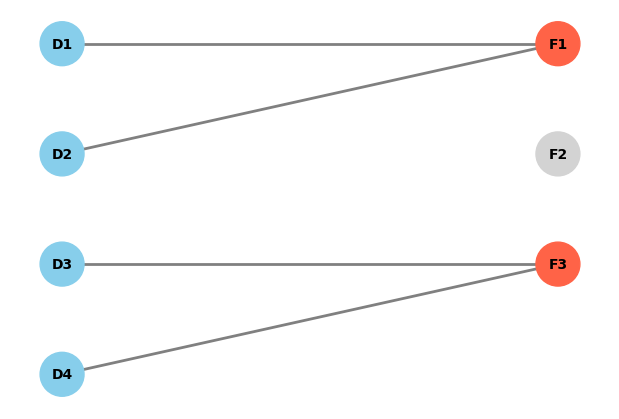

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create directed graph
G = nx.DiGraph()

# Layout config
node_colors = []
node_pos = {}
y_gap = 1.2

# Demand nodes on left
for idx, i in enumerate(I):
    G.add_node(i)
    node_colors.append('skyblue')
    node_pos[i] = (0, -idx * y_gap)

# Facility nodes on right
for idx, j in enumerate(J):
    G.add_node(j)
    color = 'tomato' if x[j].x > 0.5 else 'lightgray'
    node_colors.append(color)
    node_pos[j] = (2.5, -idx * y_gap)

# Add edges for assignments
for i in I:
    for j in J:
        if y[i, j].x > 0.5:
            G.add_edge(i, j)

# Plot
plt.figure(figsize=(6, 4))
nx.draw(G, pos=node_pos, with_labels=True,
        node_color=node_colors, node_size=1000,
        arrows=False, edge_color='gray', width=2,
        font_size=10, font_weight='bold')

plt.axis('off')
plt.tight_layout()
plt.show()


# 🧠 Example 7: Facility Location Model

This example models a **Facility Location Problem**, where we decide **which warehouses to open** and **how to assign customers to those warehouses** to minimize the **total cost**.

---

### Problem Context:

- We have a set of **customers** located at specific coordinates.
- We have a set of potential **warehouse sites** also at specific coordinates.
- Each warehouse has a **fixed setup cost** (cost to open it).
- Shipping cost depends on the **distance** between a warehouse and a customer.
- We want to:
  - **Minimize total cost = Setup cost + Shipping cost**
  - Ensure every customer is fully served (demand is met).
  - Ship only from **opened** warehouses.

---

### How distances are calculated:
- We use **Euclidean distance** between customer and warehouse locations.
- This models real-world distance and transportation cost.

---

### Variables and Decisions:
- **Select[f] = 1** if we open warehouse *f*, 0 otherwise.
- **Assign[c,f]** = fraction of customer *c*’s demand served by warehouse *f* (between 0 and 1).
- Assignments can be fractional, meaning customers can be served from multiple warehouses.

---

### Objective:
Minimize the sum of:
- Warehouse setup costs
- Shipping costs (distance × fraction served × cost per mile)

---

### New Library used:
- **itertools.product:** To generate all pairs of customers and facilities for decision variables.
- **math.sqrt:** To calculate Euclidean distances.

In [ ]:
# Facilities Model

from itertools import product
from math import sqrt

import gurobipy as gp
from gurobipy import GRB

# Parameters
customers = [(0,1.5), (2.5,1.2)]
facilities = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,1), (2,2)]
setup_cost = [3,2,3,1,3,3,4,3,2]
cost_per_mile = 1

# This function determines the Euclidean distance between a facility and customer sites.

def compute_distance(loc1, loc2):
    dx = loc1[0] - loc2[0]
    dy = loc1[1] - loc2[1]
    return sqrt(dx*dx + dy*dy)

# Compute key parameters of MIP model formulation

num_facilities = len(facilities)
num_customers = len(customers)
cartesian_prod = list(product(range(num_customers), range(num_facilities)))

# Compute shipping costs

shipping_cost = {(c,f): cost_per_mile*compute_distance(customers[c], facilities[f]) for c, f in cartesian_prod}

# MIP  model formulation

m = gp.Model('facility_location')

select = m.addVars(num_facilities, vtype=GRB.BINARY, name='Select')
assign = m.addVars(cartesian_prod, ub=1, vtype=GRB.CONTINUOUS, name='Assign')

m.addConstrs((assign[(c,f)] <= select[f] for c,f in cartesian_prod), name='Setup2ship')
m.addConstrs((gp.quicksum(assign[(c,f)] for f in range(num_facilities)) == 1 for c in range(num_customers)), name='Demand')

m.setObjective(select.prod(setup_cost)+assign.prod(shipping_cost), GRB.MINIMIZE)

m.optimize()

# display optimal values of decision variables

for facility in select.keys():
    if (abs(select[facility].x) > 1e-6):
        print(f"\n Build a warehouse at location {facility + 1}.")

# Shipments from facilities to customers.

for customer, facility in assign.keys():
    if (abs(assign[customer, facility].x) > 1e-6):
        print(f"\n Supermarket {customer + 1} receives {round(100*assign[customer, facility].x, 2)} % of its demand  from Warehouse {facility + 1} .")

Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 20 rows, 27 columns and 54 nonzeros
Model fingerprint: 0x0939f503
Variable types: 18 continuous, 9 integer (9 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-01, 4e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.00s
Presolved: 20 rows, 27 columns, 54 nonzeros
Variable types: 18 continuous, 9 integer (9 binary)
Found heuristic solution: objective 25.0385165

Root relaxation: objective 4.723713e+00, 15 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0       4.7237129    4.72371  0.00

# 🖼️ Visualization

This graph shows:
- Which warehouses are built (red nodes).
- Which customers are connected to which warehouses (edges).
- Unopened warehouses are shown in gray.
- Customer nodes are blue.

Each edge implies a shipment path, with line thickness or color optionally showing shipment proportion or cost (if implemented).

This provides an intuitive picture of the optimal facility placement and customer assignment.


In [ ]:
import networkx as nx
import plotly.graph_objects as go

# Node sets and colors
customer_nodes = [f"C{c+1}" for c in range(num_customers)]
facility_nodes = [f"W{f+1}" for f in range(num_facilities)]

# Colors: Blue = customer, Red = open warehouse, Gray = closed warehouse
node_colors = []
for f in range(num_facilities):
    if select[f].x > 0.5:
        node_colors.append('red')   # Open warehouse
    else:
        node_colors.append('lightgray')  # Closed warehouse
node_colors = ['blue']*num_customers + node_colors

# Create graph
G = nx.Graph()

# Add nodes with positions (grid layout)
pos = {}

# Place customers on left (x=0), spaced by y
for idx, c in enumerate(customer_nodes):
    G.add_node(c)
    pos[c] = (0, -idx)

# Place facilities on right (x=2), spaced by y
for idx, f in enumerate(facility_nodes):
    G.add_node(f)
    pos[f] = (2, -idx)

# Add edges for assigned shipments (only if assignment > 0.01)
for (c, f), var in assign.items():
    if var.x > 0.01:
        c_node = f"C{c+1}"
        f_node = f"W{f+1}"
        G.add_edge(c_node, f_node, weight=var.x)

# Create edge traces for Plotly (thickness by assignment fraction)
edge_x = []
edge_y = []
edge_width = []

for edge in G.edges(data=True):
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]
    # Scale width for visibility
    edge_width.append(max(1, 10 * edge[2]['weight']))

edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    line=dict(width=2, color='gray'),
    hoverinfo='none',
    mode='lines'
)

# Node traces
node_x = [pos[node][0] for node in G.nodes()]
node_y = [pos[node][1] for node in G.nodes()]
node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    mode='markers+text',
    hoverinfo='text',
    marker=dict(
        color=node_colors,
        size=20,
        line=dict(width=2, color='black')
    ),
    text=[node for node in G.nodes()],
    textposition="top center"
)

# Create figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title="📍 Facility Location Assignment Visualization",
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20,l=20,r=20,t=40),
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
                ))

fig.show()
